In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from data_utils.dataset import *
from helper_utils.helper import *


players_classes = ["waiting", "setting", "digging", "falling", "spiking", "blocking", "jumping", "moving", "standing"]
players_labels = {class_name:label for label, class_name in enumerate(players_classes)}

group_classes = ['l-pass', 'r-pass', 'l_set', 'r_set' ,'l-spike', 'r_spike', 'l_winpoint', 'r_winpoint']
group_labels = {groub_class:label for label, groub_class in enumerate(group_classes)}

videos_path = 'H:/Group-Activity-Recognition/dataset-sample/videos'
annot_path  = 'H:/Group-Activity-Recognition/dataset-sample/annot_all.pkl'

videos = [7, 10]

transforms = A.Compose([
    A.Resize(224, 224),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    ToTensorV2()
])

#### Image-level, single frame, no crop

In [2]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=group_labels,
    split=videos,
    only_middle_frame=False,
    mode='image_level',
    transform=transforms
)

In [3]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([3, 224, 224]), 7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


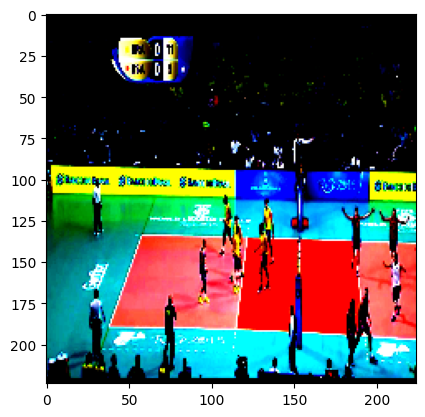

In [4]:
show_image(data_set[0][0])

#### Image-level, sequence, no crop

In [5]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=group_labels,
    split=videos,
    only_middle_frame=False,
    mode='image_level',
    seq=True,
    transform=transforms
)

In [6]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([9, 3, 224, 224]), 7)

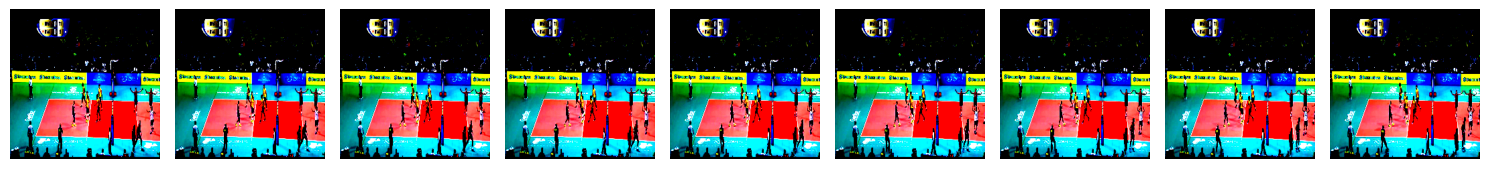

In [7]:
show_frame(data_set[0][0])

#### Image-level, single frame, with crop

In [8]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=group_labels,
    split=videos,
    only_middle_frame=False,
    mode='image_level',
    crop=True,
    transform=transforms
)

In [9]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([12, 3, 224, 224]), 7)

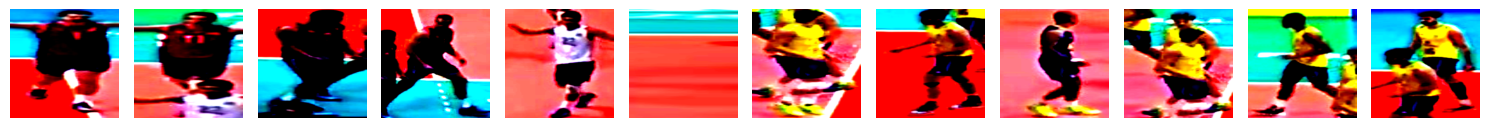

In [10]:
show_frame(data_set[0][0])

#### Image-level, sequence, with crop

In [11]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=group_labels,
    split=videos,
    only_middle_frame=False,
    mode='image_level',
    crop=True,
    seq=True,
    transform=transforms
)

In [12]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([9, 12, 3, 224, 224]), 7)

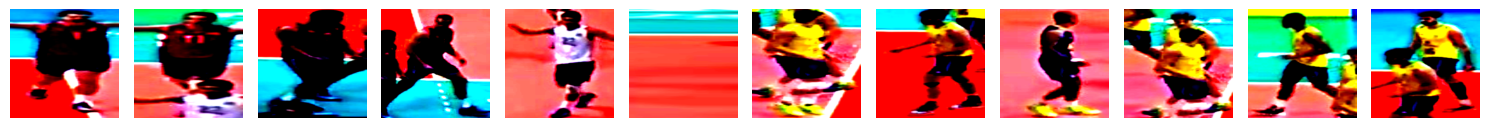

In [13]:
show_frame(data_set[0][0][0])

#### Player-level, single frame

In [14]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=group_labels,
    split=videos,
    only_middle_frame=False,
    mode='player_level',
    transform=transforms
)

In [15]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([3, 224, 224]), -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.6051416].


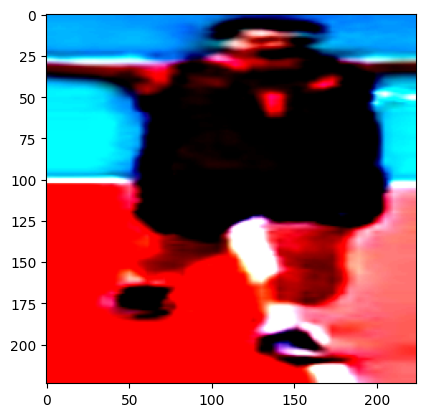

In [16]:
show_image(data_set[0][0])

#### Player-level, sequence

In [17]:
data_set = Group_Activity_Recognition_Dataset(
    videos_path=videos_path,
    annot_path=annot_path,
    labels=players_labels,
    split=videos,
    only_middle_frame=False,
    mode='player_level',
    seq=True,
    transform=transforms
)

In [18]:
data_set[0][0].shape, data_set[0][1]

(torch.Size([9, 3, 224, 224]), 8)

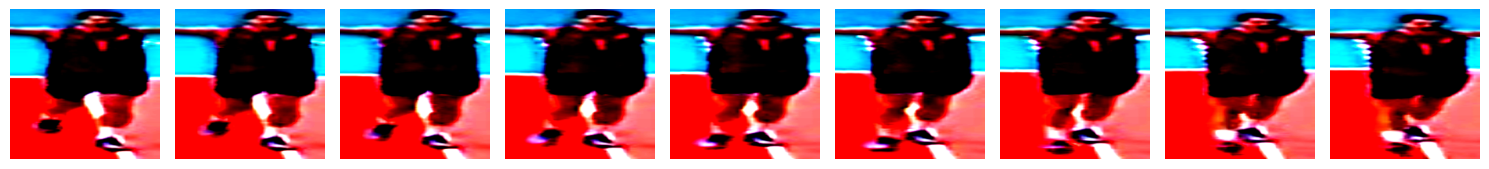

In [19]:
show_frame(data_set[0][0])